# Prediction using supervised ML

# **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author : Divyam Singh

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

### Reading data from the given link

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
df.head(10)   # seeing first five rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.tail()  # seeing last five rows of data

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### checking for missing values

In [7]:
df.isnull().sum()   # there are no null values

Hours     0
Scores    0
dtype: int64

### Lets plot a graph to see the relation of hours and scores

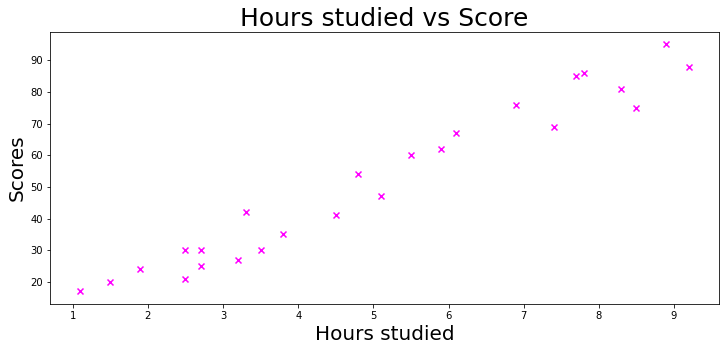

In [27]:
#Scatter plot:
plt.figure(figsize=(12,5))
plt.xlabel('Hours studied',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title('Hours studied vs Score', fontsize=25)
plt.scatter(df.Hours,df.Scores,color='magenta',marker='x')
plt.show()

In [9]:
# from the scatter plot , it can be concluded that the hours studied and Scores have positive linear relationship 

In [10]:
X = df.iloc[:,:-1].values   # independent feature
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y = df.iloc[:,1].values     # dependent feature
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### splitting the dataframe into train and test sets.

In [12]:
from sklearn.model_selection import train_test_split   #importing train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 101 , test_size=0.2) # test size = 20%

In [13]:
# 80% percent of the data is training data and 20% percent of the data is the test data

### Model Training

In [14]:
lr = LinearRegression()    # initiating the instance   
lr.fit(X_train, y_train)   # Fitting/training   

print("Training is completed successfully.")

Training is completed successfully.


In [15]:
lr.coef_    # slope of line (m)

array([9.73330705])

In [16]:
lr.intercept_   # intercept value (c)

2.5121292983200902

In [17]:
# our regression line according to the formula: y = mx + c

Y = lr.coef_*X_train + lr.intercept_
Y

array([[49.23200315],
       [33.65871187],
       [85.24523925],
       [52.15199527],
       [13.21876706],
       [61.88530232],
       [26.84539693],
       [46.31201104],
       [17.11208988],
       [69.67194797],
       [28.79205834],
       [36.57870398],
       [83.29857784],
       [34.63204257],
       [28.79205834],
       [89.13856207],
       [78.43192431],
       [92.05855419],
       [21.0054127 ],
       [59.93864091]])

Text(0.5, 1.0, 'Regression line(Train set)')

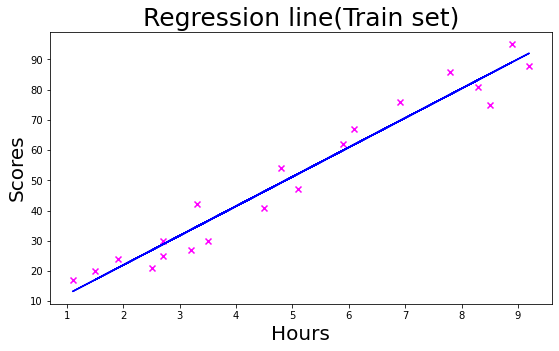

In [18]:
##plotting reggresion line on train data
plt.figure(figsize=(9,5))
plt.scatter(X_train,y_train,color='magenta',marker='x')
plt.plot(X_train,Y,color='blue')
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Scores",fontsize=20)
plt.title("Regression line(Train set)",fontsize=25)

### Predicting the scores for the test data

In [19]:
y_pred = lr.predict(X_test)
y_pred

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

### Plotting Regression line with test data

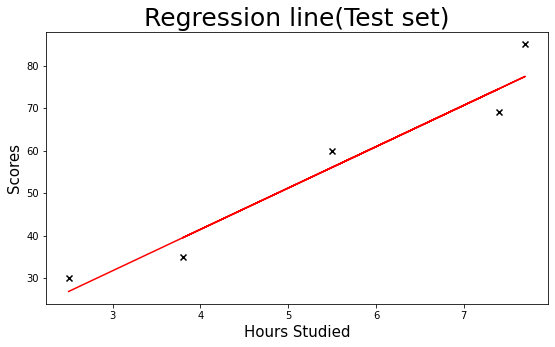

In [20]:
#plotting line on test data
plt.figure(figsize=(9,5))
plt.plot(X_test,y_pred,color='red')
plt.scatter(X_test,y_test,color='black',marker='x')
plt.xlabel("Hours Studied",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=25)
plt.show()

### Predicted vs Actual Values

In [21]:
y_test_ = list(y_test)
prediction=list(y_pred)
df_actual_vs_pred = pd.DataFrame({ 'Actual':y_test_,'Result':prediction})
df_actual_vs_pred

,Actual,Result
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


### Accuracy of the Model

In [22]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9377551740781869

### R-squared measures the strength of the relationship between your linear model and the dependent variables on a 0 - 100% scale. Our model is performing well at 93%

### Errors 

In [23]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 26.675642597052256
Root Mean Squared Error: 5.164846812544614
Mean Absolute Error: 4.937597792467706


# What will be predicted score if a student studies for 9.25 hours/day?

In [24]:
answer = lr.predict([[9.25]])
print("predicted score for a student studying for 9.25 hours per day is:", answer)

predicted score for a student studying for 9.25 hours per day is: [92.54521954]


# Ans: From the above code , it can be concluded that if a student studies for 9.25 hours per day then that student will be able to secure 92.5 marks. 